In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.metrics import mean_squared_error
import math
import cv2

In [2]:
os.getcwd()

'c:\\Users\\User\\Desktop\\Work\\Year4_1\\Image_Processing\\Project'

# Ground Truth

In [3]:
gt = pd.read_csv("./ground_truth.txt", sep=" ",header=None)
gt

,0,1
0,1,5
1,2,10
2,3,2
3,4,0
4,5,1
...,...,...
295,296,5
296,297,20
297,298,15
298,299,11


In [4]:
gt.columns = ['file_name','n']
gt.set_index('file_name',inplace=True)
gt

,n
file_name,
1,5
2,10
3,2
4,0
5,1
...,...
296,5
297,20
298,15


# EffDet

In [5]:
effDet = pd.read_csv("./automl/efficientdet/counting/efficientdet-d6.txt", sep=" ",header=None)
effDet

,0,1
0,1,2
1,10,3
2,100,2
3,101,5
4,102,5
...,...,...
295,95,8
296,96,5
297,97,10
298,98,8


In [6]:
effDet.columns = ['file_name','n']
effDet.sort_values(by='file_name',inplace=True)
effDet.set_index('file_name',inplace=True)
effDet

,n
file_name,
1,2
2,2
3,8
4,7
5,4
...,...
296,3
297,4
298,3


In [7]:
eff_MSE = mean_squared_error(gt['n'],effDet['n'])
eff_RMSE = math.sqrt(eff_MSE)
print("Efficient Net MSE : ",eff_MSE)
print("Efficient Net RMSE : ",eff_RMSE)

Efficient Net MSE :  29.783333333333335
Efficient Net RMSE :  5.4574108635261585


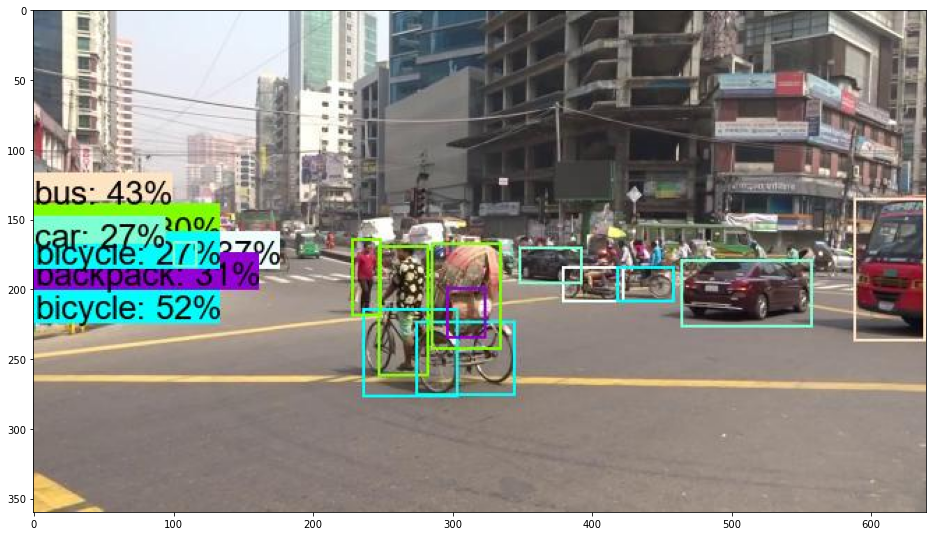

result :  7


In [28]:
n = 300
image = mpimg.imread(f"./automl/efficientdet/effDet_result/{n}.jpg")
plt.figure(figsize = (16,20))
plt.imshow(image)
plt.show()
print("result : ",effDet.loc[n]['n'])

# YOLO

In [20]:
yolo = pd.read_csv("./counting_yolo/yolov5x6.txt", sep=" ",header=None)
yolo

,0,1
0,1,1
1,10,2
2,100,1
3,101,5
4,102,4
...,...,...
295,95,4
296,96,6
297,97,4
298,98,3


In [21]:
yolo.columns = ['file_name','n']
yolo.sort_values(by='file_name',inplace=True)
yolo.set_index('file_name',inplace=True)
yolo

,n
file_name,
1,1
2,1
3,5
4,3
5,2
...,...
296,1
297,3
298,1


In [22]:
yolo_MSE = mean_squared_error(gt['n'],yolo['n'])
yolo_RMSE = math.sqrt(yolo_MSE)
print("Yolo Net MSE : ",yolo_MSE)
print("Yolo Net RMSE : ",yolo_RMSE)

Yolo Net MSE :  42.81333333333333
Yolo Net RMSE :  6.543189843901317


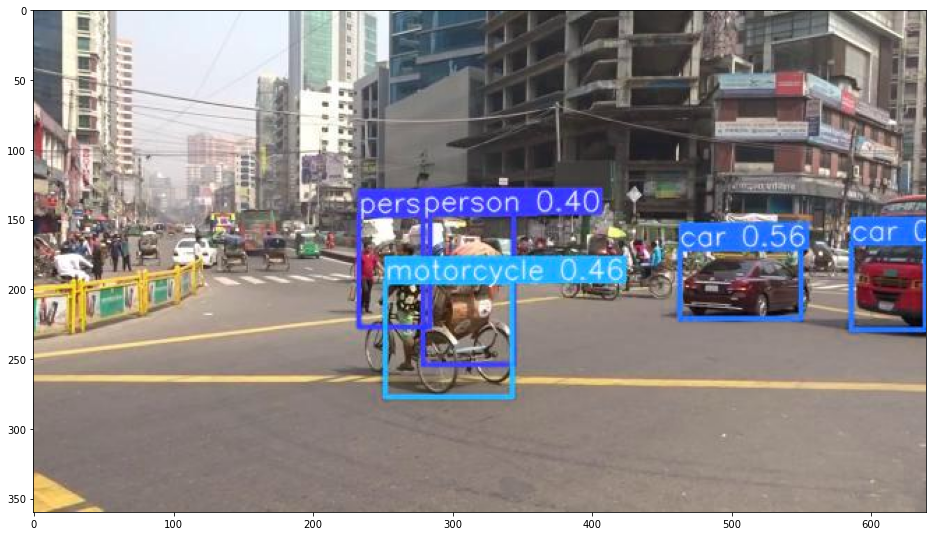

result :  3


In [29]:
n = 300
image = mpimg.imread(f"./yolo_result/{n}.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (16,20))
plt.imshow(image)
plt.show()
print("result : ",yolo.loc[n]['n'])